In [152]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

np.set_printoptions(precision=4, suppress=True)

In [2]:
# from scipy.io import arff
# data, meta = arff.loadarff('../week-1/mnist_784.arff')

In [3]:
# df = pd.DataFrame(data)
# df.to_csv("mnist_784.csv", index=False)

In [29]:
df = pd.read_csv("mnist_784.csv")
df['class'] = df['class'].apply(lambda x: int(x[2:-1]))

df

,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,pixel9,pixel10,...,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783,pixel784,class
0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
69995,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2
69996,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
69997,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4
69998,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5


In [40]:
df_train = df.iloc[:60000]
df_test = df.iloc[60000:]

df_train.shape
df_test.shape

(60000, 785)

(10000, 785)

In [57]:
df_train_two = df_train[df_train['class'] == 2]
df_test_two = df_test[df_test['class'] == 2]

df_train_two.shape
df_test_two.shape

(5958, 785)

(1032, 785)

In [165]:
X_train = df_train_two.iloc[:100, :-1].values.T
X_test = df_test_two.iloc[:1, :-1].values.T

X_train.shape
X_test.shape

(784, 100)

(784, 1)

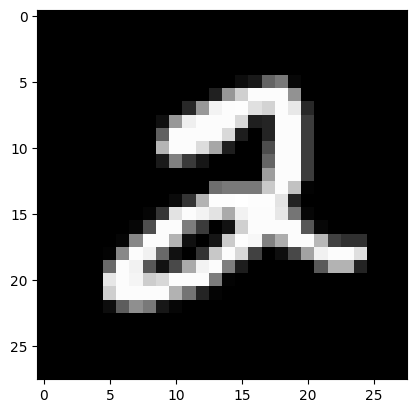

In [166]:
_ = plt.imshow(X_train[:, 0].reshape(28, 28), cmap="gray")

# PCA

In [167]:
X_train_mean = X_train.mean(axis=1, keepdims=True)
X_train = X_train - X_train_mean

In [168]:
n = X_train.shape[1]
C = X_train @ X_train.T / n
C.shape

(784, 784)

In [169]:
eigenvalues, eigenvectors = np.linalg.eigh(C)
sorted_indices = eigenvalues.argsort()[::-1]
eigenvalues = eigenvalues[sorted_indices]
eigenvectors = eigenvectors[:, sorted_indices]

eigenvalues.shape
eigenvectors.shape

(784,)

(784, 784)

In [170]:
def find_k(threshold):
  return np.argmax(np.cumsum(eigenvalues) / sum(eigenvalues) >= threshold) + 1


for t in [.2, .5, .8, .95, 1]:
  print(f"t={t*100}%,  k={find_k(t)}")

t=20.0%,  k=2
t=50.0%,  k=6
t=80.0%,  k=22
t=95.0%,  k=53
t=100%,  k=99


In [171]:
k = find_k(0.95)
W = eigenvectors[:, :k]
W.shape

(784, 53)